In [226]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import copy
import pvlib
import random
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set_theme()
from sklearn.preprocessing import scale

In [227]:
data = pd.read_csv( 'Data_Files/epl-training.csv',index_col=0)
data = data.dropna(axis=1, how='all')

In [228]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HC,AC,HY,AY,HR,AR,Unnamed: 70,Unnamed: 71,Unnamed: 72
Date,,,,,,,,,,,,,,,,,,,,,
16/08/08,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,...,8,7,5,0,0,0,0,NaN,NaN,NaN
16/08/08,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,...,12,4,3,1,2,0,0,NaN,NaN,NaN
16/08/08,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,...,9,3,5,2,2,0,0,NaN,NaN,NaN
16/08/08,Hull,Fulham,2,1,H,1,1,D,P Walton,11,...,9,5,6,3,0,0,0,NaN,NaN,NaN
16/08/08,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,...,12,7,9,1,2,0,0,NaN,NaN,NaN


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 16/08/08 to 26/07/2020
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomeTeam     4560 non-null   object 
 1   AwayTeam     4560 non-null   object 
 2   FTHG         4560 non-null   int64  
 3   FTAG         4560 non-null   int64  
 4   FTR          4560 non-null   object 
 5   HTHG         4560 non-null   int64  
 6   HTAG         4560 non-null   int64  
 7   HTR          4560 non-null   object 
 8   Referee      4560 non-null   object 
 9   HS           4560 non-null   int64  
 10  AS           4560 non-null   int64  
 11  HST          4560 non-null   int64  
 12  AST          4560 non-null   int64  
 13  HF           4560 non-null   int64  
 14  AF           4560 non-null   int64  
 15  HC           4560 non-null   int64  
 16  AC           4560 non-null   int64  
 17  HY           4560 non-null   int64  
 18  AY           4560 non-null   int64  
 19

In [230]:
# dont know what is the point of column 70,71,72 yet. 
# As most of the values of them are null and not named & explanied
# For now assume they are meaningless and delete
data.loc[data['Unnamed: 70'].notnull()]

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HC,AC,HY,AY,HR,AR,Unnamed: 70,Unnamed: 71,Unnamed: 72
Date,,,,,,,,,,,,,,,,,,,,,
18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,...,8,7,0,0,0,0,0,1.44,4.72,8.71
18/08/12,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,...,11,6,3,0,0,0,0,1.84,3.75,4.75
18/08/12,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,...,8,3,5,2,2,0,0,2.83,3.35,2.72
18/08/12,QPR,Swansea,0,5,A,0,1,A,L Probert,20,...,14,5,3,2,2,0,0,2.00,3.53,4.15
18/08/12,Reading,Stoke,1,1,D,0,1,A,K Friend,9,...,14,4,3,2,4,0,1,2.47,3.30,3.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/05/13,Swansea,Fulham,0,3,A,0,1,A,L Mason,19,...,9,8,0,2,1,0,0,1.66,4.09,5.76
19/05/13,Tottenham,Sunderland,1,0,H,0,0,D,A Marriner,23,...,12,14,1,1,3,0,1,1.25,6.60,15.00
19/05/13,West Brom,Man United,5,5,D,1,3,A,M Oliver,15,...,6,3,5,0,1,0,0,3.65,3.42,2.17


In [231]:
del data['Unnamed: 70']
del data['Unnamed: 71']
del data['Unnamed: 72']
data.isnull().values.any()

False

In [232]:
# Think about how to use referee as prior
data['Referee'].value_counts().head(10) 

M Dean           349
M Atkinson       336
A Marriner       298
M Oliver         266
A Taylor         258
L Mason          253
K Friend         229
J Moss           225
M Clattenburg    207
M Jones          202
Name: Referee, dtype: int64

In [233]:
#some team play more often
data['HomeTeam'].value_counts()

Tottenham           228
Man United          228
Everton             228
Chelsea             228
Man City            228
Liverpool           228
Arsenal             228
West Ham            209
Newcastle           190
Stoke               190
West Brom           171
Aston Villa         171
Sunderland          171
Southampton         152
Fulham              133
Swansea             133
Crystal Palace      133
Leicester           114
Burnley             114
Hull                 95
Watford              95
Wigan                95
Norwich              95
Bournemouth          95
Wolves               95
Blackburn            76
Bolton               76
QPR                  57
Brighton             57
Birmingham           38
Portsmouth           38
Middlesbrough        38
Cardiff              38
Huddersfield         38
Reading              19
Sheffield United     19
Blackpool            19
Name: HomeTeam, dtype: int64

In [234]:
# Total team number
hometeam = data['HomeTeam'].unique()
hometeam.size

37

In [235]:
data.index= pd.to_datetime(data.index)
data = data.sort_index()
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-11,Chelsea,Sunderland,5,0,H,3,0,H,M Atkinson,17,...,11,0,5,11,4,0,0,1,0,0
2008-01-11,Everton,Fulham,1,0,H,0,0,D,L Mason,9,...,4,5,11,15,6,5,0,0,0,0
2008-01-11,Man United,Hull,4,3,H,3,1,H,M Dean,20,...,11,7,12,13,9,1,2,2,0,0
2008-01-11,Middlesbrough,West Ham,1,1,D,0,1,A,A Marriner,11,...,7,8,10,14,5,4,3,4,0,0
2008-01-11,Portsmouth,Wigan,1,2,A,0,1,A,P Walton,16,...,8,8,9,11,9,6,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,1,6,A,0,4,A,J Moss,7,...,1,12,5,12,2,4,2,1,0,0
2020-12-07,Aston Villa,Crystal Palace,2,0,H,1,0,H,M Atkinson,12,...,9,5,21,21,5,1,2,4,0,1
2020-12-07,Bournemouth,Leicester,4,1,H,0,1,A,S Attwell,10,...,4,5,11,12,2,6,2,1,0,1


### Baseline

In [236]:
#accuracy of prediction 'all home team will win'
data['FTR'].value_counts()['H']/data.shape[0]

0.4611842105263158

In [237]:
#accuracy of prediction 'all away team will win'
data['FTR'].value_counts()['A']/data.shape[0]

0.2912280701754386

### Data preparation
#### Firstly, we simplify the problem to predicting the possibility of home team winning-a binary classification

In [464]:

def home_win(result):
    if result =='H': return 1
    elif result =='A': return 0
    else: return 2
    
def home_win(result):
    return result =='H' and 1 or 0

In [465]:
team_history= data[['HomeTeam', 'AwayTeam', 'FTR','FTHG','FTAG']].copy()
#team_history['FTR']= team_history['FTR'].apply(home_win)
team_history['FTR']= team_history['FTR'].apply(home_win)

In [466]:
team_history

,HomeTeam,AwayTeam,FTR,FTHG,FTAG
Date,,,,,
2008-01-11,Chelsea,Sunderland,1,5,0
2008-01-11,Everton,Fulham,1,1,0
2008-01-11,Man United,Hull,1,4,3
2008-01-11,Middlesbrough,West Ham,0,1,1
2008-01-11,Portsmouth,Wigan,0,1,2
...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,0,1,6
2020-12-07,Aston Villa,Crystal Palace,1,2,0
2020-12-07,Bournemouth,Leicester,1,4,1


In [467]:
#'VG'-valid full time goal (home - away or away - home) per period of time
team_history['HVG'] = np.nan
team_history['AVG'] = np.nan
team_history['HHVG'] = np.nan
team_history['HAVG'] = np.nan

In [468]:
FULLTIME = 0
HALFTIME = 1
PERIOD = 380*7
def valid_goals_per_period(df,period,time_len):
    hometeam = df['HomeTeam'].unique()
    teams_goals = pd.DataFrame(index=df.index.values, columns=hometeam)
    if time_len==FULLTIME:
        hg = 'FTHG'
        ag = 'FTAG'
    elif time_len==HALFTIME:
        hg = 'HTHG'
        ag = 'HTAG'
    else:
        raise Exception("Sorry, time lenth should be FULLTIME or HALFTIME")
      
    for i in range(len(df)):
        
        teams_goals[df.iloc[i]['HomeTeam'] ][i] = df.iloc[i][hg] - df.iloc[i][ag]
        teams_goals[df.iloc[i]['AwayTeam']][i] = df.iloc[i][ag] - df.iloc[i][hg]
    
    teams_goals=teams_goals.fillna(0)
    
    for i in range (len(teams_goals)):
        if i%period!=0: 
            teams_goals.iloc[i] += teams_goals.iloc[i-1]

    return teams_goals

#'VG'-valid goal per period of time
def get_valid_full_goals(df,goalcount_df,time_len):
    if time_len==FULLTIME:
        hg = 'HVG'
        ag = 'AVG'
    elif time_len==HALFTIME:
        hg = 'HHVG'
        ag = 'HAVG'
    else:
        raise Exception("Sorry, time lenth should be FULLTIME or HALFTIME")
    for i in range(1,len(df)):
        df[hg].iloc[i]=goalcount_df[df['HomeTeam'].iloc[i]].iloc[i-1]
        df[ag].iloc[i]=goalcount_df[df['AwayTeam'].iloc[i]].iloc[i-1]
    

In [469]:
full_time_goal_count=valid_goals_per_period(data,PERIOD,FULLTIME)
half_time_goal_count=valid_goals_per_period(data,PERIOD,HALFTIME)
get_valid_full_goals(team_history,full_time_goal_count,FULLTIME)
get_valid_full_goals(team_history,half_time_goal_count,HALFTIME)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [470]:
#rate of shots on target by home and away team
#team_history['HTSR'] = data['HST']/data['HS']
#team_history['ATSR'] = data['AST']/data['AS']
#team_history

In [471]:
def period_win_score(df, period):
    hometeam = data['HomeTeam'].unique()
    teams_score = pd.DataFrame(index=df.index.values, columns=hometeam)
    
    for i in range(len(df)):    
        teams_score[df.iloc[i]['HomeTeam'] ][i] = (df.iloc[i]['FTR']=='H' and 2) or (df.iloc[i]['FTR']=='D' and 1) or 0 
        teams_score[df.iloc[i]['AwayTeam']][i] = (df.iloc[i]['FTR']=='A' and 2) or (df.iloc[i]['FTR']=='D' and 1) or 0
    teams_score = teams_score.fillna(0)
    
    for i in range (len(teams_score)):
        if i%period!=0: 
            teams_score.iloc[i] += teams_score.iloc[i-1]
    
    return teams_score

def get_win_score(df,winscore_df):
    for i in range(1,len(df)):
        df['HWS'].iloc[i]=winscore_df[df['HomeTeam'].iloc[i]].iloc[i-1]
        df['AWS'].iloc[i]=winscore_df[df['AwayTeam'].iloc[i]].iloc[i-1]

In [472]:
# home periodical (every 100 game here) win score 
team_history['HWS'] = np.nan
team_history['AWS'] = np.nan
teams_win_score = period_win_score(data,PERIOD)
get_win_score(team_history,teams_win_score)


In [473]:
team_history = team_history.fillna(0) 

In [474]:
team_history

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HVG,AVG,HHVG,HAVG,HWS,AWS
Date,,,,,,,,,,,
2008-01-11,Chelsea,Sunderland,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Everton,Fulham,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Man United,Hull,1,4,3,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Middlesbrough,West Ham,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-11,Portsmouth,Wigan,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,0,1,6,-71.0,288.0,-25.0,129.0,38.0,291.0
2020-12-07,Aston Villa,Crystal Palace,1,2,0,-76.0,-56.0,-29.0,-37.0,38.0,158.0
2020-12-07,Bournemouth,Leicester,1,4,1,-89.0,41.0,-43.0,-10.0,150.0,204.0


In [475]:
def match_results(df):
    teams = {}
    for i in df['HomeTeam'].unique():
        teams[i] = {}
    for i in range(len(df)):
        if df.iloc[i].FTR == 'H':
            teams[df.iloc[i].HomeTeam][i] = 1 
            teams[df.iloc[i].AwayTeam][i] = 0 
        elif df.iloc[i].FTR == 'A':
            teams[df.iloc[i].AwayTeam][i] = 1
            teams[df.iloc[i].HomeTeam][i] = 0
        else:
            teams[df.iloc[i].AwayTeam][i] = 0
            teams[df.iloc[i].HomeTeam][i] = 0
            
    for i in teams:
        teams[i] = pd.DataFrame.from_dict(teams[i],orient='index')
            
    return teams

def get_last3res(df):
    col = ['HR1','HR2','HR3','AR1','AR2','AR3','H3WR','A3WR']
    past3res = pd.DataFrame(index=df.index.values, columns=col)
    res = match_results(df)
    
    for i in range(38,len(df)):
        hr = res[df.iloc[i].HomeTeam].loc[:i].tail(4)
        ar = res[df.iloc[i].AwayTeam].loc[:i].tail(4)
        
        
        if hr.size==4:
            hr= hr.iloc[:3]
            past3res['HR1'].iloc[i]=hr.iloc[2][0]
            past3res['HR2'].iloc[i]=hr.iloc[1][0]
            past3res['HR3'].iloc[i]=hr.iloc[0][0]
            past3res['H3WR'].iloc[i]=len(hr[hr[0]==1])/3


        

        if ar.size==4:
            ar= ar.iloc[:3]
            past3res['AR1'].iloc[i]=ar.iloc[2][0]
            past3res['AR2'].iloc[i]=ar.iloc[1][0]
            past3res['AR3'].iloc[i]=ar.iloc[0][0]
            past3res['A3WR'].iloc[i]=len(ar[ar[0]==1])/3


    
    return past3res

res = get_last3res(data)
team_history = pd.concat([team_history, res], axis=1)

In [476]:
#There is not enough historical data so we are dropping the first 38 lines of data
team_history = team_history.iloc[38:]
team_history = team_history.fillna(0) 

In [477]:
def show_heatmap(df):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    ax = sns.heatmap(df.corr(),annot=True,square=True, fmt=".2f")
    plt.show()

In [348]:
'''
The prepared data for training. (Eliminate HomeTeam, AwayTeam in traning data though)

HVG/AVG: Home/Away team fulltime valid goals 
= home/away fulltime goal - away/home fulltime goal. Resets every 100 match

HHVG/HAVG: Home/Away team halftime valid goals 
= home/away halftime goal - away/home halftime goal. Resets every 100 match

HTSR/ATSR: Home/Away shots or target rate

HWS/AWS: Home/Away team winning score. 
Resets every 100 match. Calculated by the following rule:
    Win-2
    D-1
    Lose-0
'''
team_history

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HVG,AVG,HHVG,HAVG,HWS,AWS,HR1,HR2,HR3,AR1,AR2,AR3,H3WR,A3WR
2008-08-16,Bolton,Stoke,1,3,1,3.0,0.0,0.0,-2.0,6.0,4.0,1,0,1,0,0,0,0.666667,0.000000
2008-08-16,Everton,Blackburn,0,2,3,2.0,-4.0,1.0,0.0,5.0,1.0,1,0,0,0,0,0,0.333333,0.000000
2008-08-16,Hull,Fulham,1,2,1,0.0,-2.0,-1.0,0.0,4.0,1.0,0,1,1,0,0,0,0.666667,0.000000
2008-08-16,Middlesbrough,Tottenham,1,2,1,0.0,2.0,-1.0,-2.0,3.0,4.0,0,1,0,1,0,1,0.333333,0.666667
2008-08-16,Sunderland,Liverpool,0,0,1,-7.0,5.0,-2.0,1.0,1.0,7.0,0,0,0,1,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,Aston Villa,Man City,0,1,6,-71.0,288.0,-25.0,129.0,38.0,291.0,0,0,0,1,1,0,0.000000,0.666667
2020-12-07,Aston Villa,Crystal Palace,1,2,0,-76.0,-56.0,-29.0,-37.0,38.0,158.0,0,0,0,0,0,0,0.000000,0.000000
2020-12-07,Bournemouth,Leicester,1,4,1,-89.0,41.0,-43.0,-10.0,150.0,204.0,0,0,0,0,1,0,0.000000,0.333333
2020-12-07,Wolves,Everton,1,3,0,9.0,0.0,-18.0,8.0,83.0,187.0,0,0,0,1,0,0,0.000000,0.333333


In [478]:
tt = team_history.drop(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','HHVG','HAVG'],1, inplace=False)

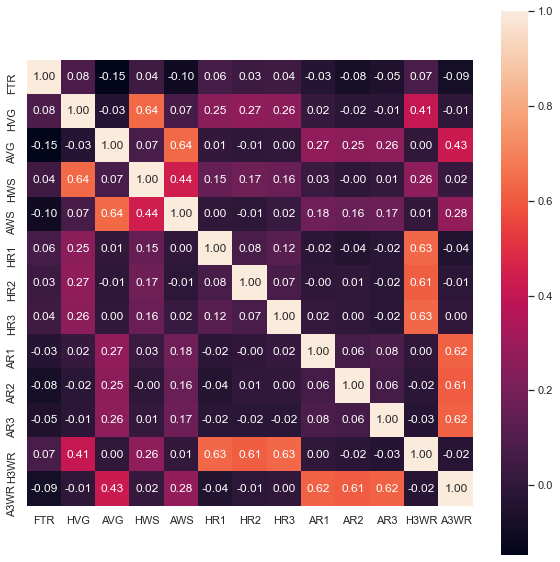

In [403]:
show_heatmap(tt)

In [479]:
x_all = tt.drop(['FTR'],1, inplace=False)


In [480]:
cols = [['HVG','AVG','HWS','AWS']]
for col in cols:
    x_all[col] = scale(x_all[col])

In [481]:
x_all

,HVG,AVG,HWS,AWS,HR1,HR2,HR3,AR1,AR2,AR3,H3WR,A3WR
2008-08-16,-0.152201,-0.196998,-1.150084,-1.176206,1,0,1,0,0,0,0.666667,0.000000
2008-08-16,-0.165618,-0.250618,-1.162193,-1.212556,1,0,0,0,0,0,0.333333,0.000000
2008-08-16,-0.192453,-0.223808,-1.174302,-1.212556,0,1,1,0,0,0,0.666667,0.000000
2008-08-16,-0.192453,-0.170188,-1.186410,-1.176206,0,1,0,1,0,1,0.333333,0.666667
2008-08-16,-0.286376,-0.129973,-1.210628,-1.139855,0,0,0,1,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,-1.145097,3.663626,-0.762603,2.301292,0,0,0,1,1,0,0.000000,0.666667
2020-12-07,-1.212185,-0.947675,-0.762603,0.689768,0,0,0,0,0,0,0.000000,0.000000
2020-12-07,-1.386612,0.352605,0.593579,1.247137,0,0,0,0,1,0,0.000000,0.333333
2020-12-07,-0.071696,-0.196998,-0.217709,1.041153,0,0,0,1,0,0,0.000000,0.333333


In [482]:
#y_all = tt.drop(['HHVG','HAVG','HVG','AVG','HWS','AWS','HR1','HR2','HR3','AR1','AR2','AR3','H3WR','A3WR'],1, inplace=False)

In [483]:
y_all = tt['FTR']

### Train


In [437]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import brier_score_loss
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all,test_size = 0.3,random_state = 2,stratify = y_all)

In [438]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("train time: {:.4f} second".format(end - start))
    
def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)
    end = time()
    print("prediction time: {:.4f} second".format(end - start))
    return f1_score(target, y_pred, pos_label=1, average='micro'), sum(target == y_pred) / float(len(y_pred))
    #return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))



def train_predict(clf, X_train, y_train, X_test, y_test):
    print("model: {}, sample size: {}。".format(clf.__class__.__name__, len(X_train)))
    train_classifier(clf, X_train, y_train)
    f1, acc = predict_labels(clf, X_train, y_train)
    print("f1 score: {:.4f} , accuracy {:.4f} on train set".format(f1 , acc))
    f1, acc = predict_labels(clf, X_test, y_test)
    print("f1 score: {:.4f} , accuracy {:.4f} on test set".format(f1 , acc))


In [360]:
clr1 = [
    LogisticRegression(penalty='l2', solver='newton-cg', multi_class='ovr',
                            C=0.1, warm_start=True),
    LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial',
                            C=0.4, warm_start=False),    
    SVC(probability=True),
    SVC(C=0.3, class_weight=None, decision_function_shape='ovo', degree=1,
            kernel='rbf', probability=True, shrinking=True, tol=0.0005),
    SVC(C=0.28, class_weight=None, decision_function_shape='ovo', degree=1,
            kernel='rbf', probability=True, shrinking=True, tol=0.0002),
    xgb.XGBClassifier(seed = 42),
    xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=2,
            min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree'),
]

for classifier in clr1:
    train_predict(classifier, X_train, y_train, X_test, y_test)
    print('')

model: LogisticRegression, sample size: 3165。
train time: 0.0435 second
prediction time: 0.0018 second
f1 score: 0.5207 , accuracy 0.5207 on train set
prediction time: 0.0016 second
f1 score: 0.5232 , accuracy 0.5232 on test set

model: LogisticRegression, sample size: 3165。
train time: 0.0245 second
prediction time: 0.0026 second
f1 score: 0.5232 , accuracy 0.5232 on train set
prediction time: 0.0022 second
f1 score: 0.5262 , accuracy 0.5262 on test set

model: SVC, sample size: 3165。
train time: 1.6296 second
prediction time: 0.1706 second
f1 score: 0.5545 , accuracy 0.5545 on train set
prediction time: 0.0685 second
f1 score: 0.5225 , accuracy 0.5225 on test set

model: SVC, sample size: 3165。
train time: 1.5030 second
prediction time: 0.1505 second
f1 score: 0.5324 , accuracy 0.5324 on train set
prediction time: 0.0664 second
f1 score: 0.5298 , accuracy 0.5298 on test set

model: SVC, sample size: 3165。
train time: 1.5679 second
prediction time: 0.1474 second
f1 score: 0.5324 , acc

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 0.4485 second
prediction time: 0.0047 second
f1 score: 0.9687 , accuracy 0.9687 on train set
prediction time: 0.0025 second
f1 score: 0.4679 , accuracy 0.4679 on test set

model: XGBClassifier, sample size: 3165。
[14:18:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:18:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 1.1173 second
prediction time: 0.0105 second
f1 score: 0.5930 , accuracy 0.5930 on train set
prediction time: 0.0068 second
f1 score: 0.5239 , accuracy 0.5239 on test set



In [439]:
clr2 = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_leaf=3),
    RandomForestClassifier(n_estimators = 200, random_state = 1, class_weight = 'balanced'),
    GaussianNB(),
    GradientBoostingClassifier(),
    LinearSVC(),
    SGDClassifier()
]
for classifier in clr2:
    train_predict(classifier, X_train, y_train, X_test, y_test)
    print('')

model: KNeighborsClassifier, sample size: 3165。
train time: 0.0049 second
prediction time: 0.1711 second
f1 score: 0.6202 , accuracy 0.6202 on train set
prediction time: 0.1042 second
f1 score: 0.4834 , accuracy 0.4834 on test set

model: RandomForestClassifier, sample size: 3165。
train time: 0.4622 second
prediction time: 0.0681 second
f1 score: 0.9997 , accuracy 0.9997 on train set
prediction time: 0.0361 second
f1 score: 0.4974 , accuracy 0.4974 on test set

model: RandomForestClassifier, sample size: 3165。
train time: 0.3570 second
prediction time: 0.0592 second
f1 score: 0.5362 , accuracy 0.5362 on train set
prediction time: 0.0382 second
f1 score: 0.5357 , accuracy 0.5357 on test set

model: RandomForestClassifier, sample size: 3165。
train time: 0.7735 second
prediction time: 0.0976 second
f1 score: 1.0000 , accuracy 1.0000 on train set
prediction time: 0.0532 second
f1 score: 0.5004 , accuracy 0.5004 on test set

model: GaussianNB, sample size: 3165。
train time: 0.0028 second
pr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [440]:
parameters = { 'n_estimators':[90,100,110],
               'max_depth': [5,6,7],
             }
clf = xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=2,
            min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree')

f1_scorer = make_scorer(f1_score,pos_label=1,average='micro')
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
f1, acc = predict_labels(clf, X_train, y_train)
print("f1 score: {:.4f} , accuracy {:.4f} on train set".format(f1 , acc))


f1, acc = predict_labels(clf, X_test, y_test)
print("f1 score: {:.4f} , accuracy {:.4f} on test set".format(f1 , acc))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find 

[15:40:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find 

[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find 

[15:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find 

In [364]:
model = xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=2,
            min_child_weight=7, gamma=0, subsample=0.8, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree')
train_predict(model, X_train, y_train, X_test, y_test)

model: XGBClassifier, sample size: 3165。
[14:20:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:20:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 1.2365 second
prediction time: 0.0119 second
f1 score: 0.5918 , accuracy 0.5918 on train set
prediction time: 0.0051 second
f1 score: 0.5225 , accuracy 0.5225 on test set


In [441]:
model = xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=2,
            min_child_weight=7, gamma=3, subsample=0.8, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree')
train_predict(model, X_train, y_train, X_test, y_test)

model: XGBClassifier, sample size: 3165。
[15:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 1.3595 second
prediction time: 0.0085 second
f1 score: 0.5529 , accuracy 0.5529 on train set
prediction time: 0.0043 second
f1 score: 0.5313 , accuracy 0.5313 on test set


In [484]:
model = xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=2,
            min_child_weight=7, gamma=3, subsample=0.9, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree')
train_predict(model, X_train, y_train_hw, X_test, y_test_hw)

model: XGBClassifier, sample size: 3165。
[15:57:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 0.5199 second
prediction time: 0.0031 second
f1 score: 0.5798 , accuracy 0.5798 on train set
prediction time: 0.0017 second
f1 score: 0.5416 , accuracy 0.5416 on test set


In [443]:
model = xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000, max_depth=2,
            min_child_weight=7, gamma=3, subsample=0.9, colsample_bytree=0.7,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree')
train_predict(model, X_train, y_train, X_test, y_test)

model: XGBClassifier, sample size: 3165。
[15:41:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:41:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 1.2486 second
prediction time: 0.0052 second
f1 score: 0.5504 , accuracy 0.5504 on train set
prediction time: 0.0026 second
f1 score: 0.5321 , accuracy 0.5321 on test set


In [458]:
#best result

model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=2,
            min_child_weight=7, gamma=3, subsample=0.9, colsample_bytree=0.9,
            scale_pos_weight=0.8, reg_alpha=1e-5, booster='gbtree')
train_predict(model, X_train, y_train, X_test, y_test)

model: XGBClassifier, sample size: 3165。
[15:51:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:51:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train time: 1.3080 second
prediction time: 0.0069 second
f1 score: 0.5441 , accuracy 0.5441 on train set
prediction time: 0.0044 second
f1 score: 0.5350 , accuracy 0.5350 on test set


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

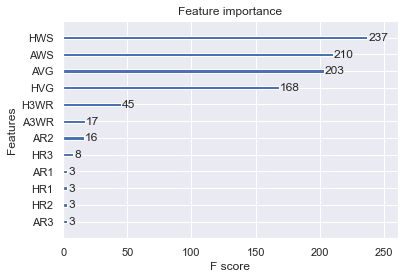

In [367]:
xgb.plot_importance(model)

In [370]:
nnclr = [
    MLPClassifier(activation='relu', hidden_layer_sizes=(8,5,3),random_state=201, max_iter=1000),
    MLPClassifier(activation='relu', hidden_layer_sizes=(7,5,3),random_state=201, max_iter=1000),
    MLPClassifier(activation='relu', hidden_layer_sizes=(8,4,2),random_state=201, max_iter=1000)



]
for classifier in nnclr:
    train_predict(classifier, X_train, y_train, X_test, y_test)
    print('')

model: MLPClassifier, sample size: 3165。
train time: 2.3876 second
prediction time: 0.0024 second
f1 score: 0.5479 , accuracy 0.5479 on train set
prediction time: 0.0017 second
f1 score: 0.5239 , accuracy 0.5239 on test set

model: MLPClassifier, sample size: 3165。
train time: 2.5721 second
prediction time: 0.0024 second
f1 score: 0.5450 , accuracy 0.5450 on train set
prediction time: 0.0017 second
f1 score: 0.5225 , accuracy 0.5225 on test set

model: MLPClassifier, sample size: 3165。
train time: 2.4882 second
prediction time: 0.0026 second
f1 score: 0.5476 , accuracy 0.5476 on train set
prediction time: 0.0016 second
f1 score: 0.5129 , accuracy 0.5129 on test set



In [ ]:
kf = KFold(n_splits=5, shuffle=False)

In [462]:
def predict_metrics(y_test, y_predict):
    '''
    0-home win
    1-home lose
    2-draw
    
    '''
    ls = [0,1,2]
    
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test, y_predict, ls)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls)
    disp.plot(include_values=True, values_format='d')
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


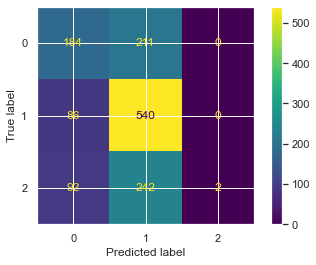

In [463]:
y_p = model.predict(X_test)
predict_metrics(y_test,y_p)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


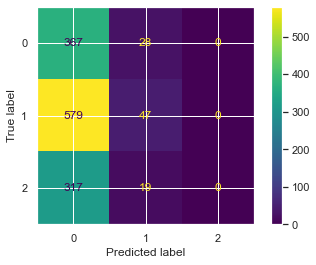

In [485]:
y_p = model.predict(X_test)
predict_metrics(y_test,y_p)